In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [4]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int
    
    sr:float
    bpb:float
    boundary_percent:float
    summary:str
    

In [17]:
def calculate_sr(state:BatsmanState):
    sr= (state['runs']/state['balls'])*100
    return {'sr':sr}

In [18]:
def calculate_bpb(state:BatsmanState):
    bpb= (state['balls']/(state['fours']+state['sixes']))
    return {'bpb':bpb}

In [19]:
def calculate_boundary_percent(state:BatsmanState):
    boundary_percent=(((state['fours']*4)+(state['sixes']*6))/state['runs'])*100
    return {'boundary_percent':boundary_percent}

In [26]:
def summary(state:BatsmanState):
    summary=f"""
    Strike Rate:{state['sr']}\n
    Balls per Boundary:{state['bpb']}\n
    Boundary Percent:{state['boundary_percent']}
    """
    state['summary']=summary
    return {'summary':summary}

In [21]:
graph=StateGraph(BatsmanState)
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundary_percent',calculate_boundary_percent)
graph.add_node('summary',summary)

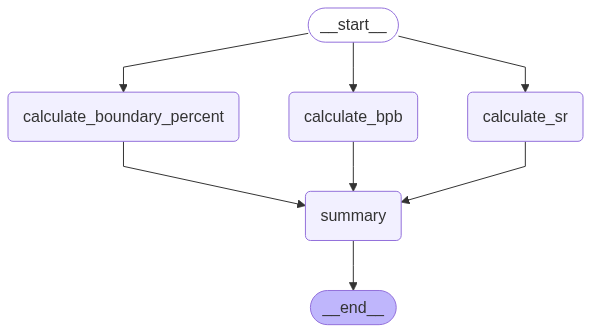

In [22]:
#edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundary_percent')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary',END)
graph.add_edge('summary',END)
graph.add_edge('summary',END)

workflow=graph.compile()
workflow

In [28]:
intial_state={
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4
}
workflow.invoke(intial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\n    Strike Rate:200.0\n\n    Balls per Boundary:5.0\n\n    Boundary Percent:48.0\n    '}

**Parallelization Workflow**

In [66]:
from langgraph.graph import START,END,StateGraph
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict
from pydantic import BaseModel,Field
from langchain_huggingface import ChatHuggingFace,HuggingFaceEndpoint
import os

In [67]:
load_dotenv()

hf_token=os.getenv("HF_TOKEN")

llm = HuggingFaceEndpoint(
    repo_id="moonshotai/Kimi-K2-Instruct",  # Use the correct model repo_id
    task="text-generation",  # You can adjust this based on your model task
    model_kwargs={"headers": {"Authorization": f"Bearer {hf_token}"}}
)

model=ChatHuggingFace(llm=llm)

In [68]:

groq_token = os.getenv("test_groq")
llm = ChatGroq(
    groq_api_key=groq_token,
    model_name="meta-llama/llama-4-scout-17b-16e-instruct"
)

In [69]:
class EvaluationSchema(BaseModel):
    
    feedback:str=Field(description="detailed feedback for the essay")
    score:int=Field(description="score out of 10",ge=0,le=10)
    

In [70]:
structure_model=llm.with_structured_output(EvaluationSchema)

In [71]:
essay="""
India plays a growing and strategic role in the global Artificial Intelligence (AI) ecosystem. Here's a breakdown of its role across several key areas:

---

### 🔬 **1. Research & Development**

* **Academic Contribution**: Institutions like the Indian Institute of Science (IISc), IITs, and IIITs are producing significant AI research, particularly in areas like computer vision, natural language processing, and AI ethics.
* **Private Sector R\&D**: Companies like TCS, Infosys, Wipro, and startups are investing in AI labs and solutions. Global firms (Google, Microsoft, Amazon) have AI research centers in India.

---

### 💼 **2. Talent Pool**

* **Large Technical Workforce**: India has one of the world’s largest populations of software developers and engineers. It produces millions of STEM graduates each year.
* **Global AI Workforce**: Many AI researchers and engineers in top positions at global tech firms are Indian or of Indian origin.

---

### 🌐 **3. AI for Social Good**

India focuses on applying AI to solve pressing challenges:

* **Agriculture**: AI for crop monitoring, yield prediction, pest control.
* **Healthcare**: Disease diagnosis (e.g., TB, cancer), telemedicine, drug discovery.
* **Education**: Personalized learning platforms.
* **Language Translation**: Tools to bridge India's multilingual landscape (like Bhashini).
* **Governance**: AI for digital public services, traffic management, and fraud detection.

---

### 🧠 **4. National AI Strategy**

India is building its AI strategy through:

* **NITI Aayog’s Initiatives**: The government think tank published a roadmap called "AI for All" focusing on five key areas—healthcare, agriculture, education, smart cities, and smart mobility.
* **National Program on AI**: Aimed at building AI infrastructure and policies.
* **Data Governance**: Work is ongoing around data protection and AI ethics.

---

### 🚀 **5. AI Startups & Innovation**

* India has over 3,000 AI startups, working in fintech, edtech, healthtech, etc.
* Incubators like T-Hub (Hyderabad) and accelerators are supporting AI innovation.
* India is emerging as a hub for AI-powered SaaS products.

---

### 🌍 **6. Global AI Diplomacy**

* India is part of international forums like the **Global Partnership on AI (GPAI)**.
* It advocates for **ethical, inclusive, and open-source AI** that benefits the Global South.
* Promotes collaboration with countries like the U.S., Japan, and EU for AI research and regulation.

---

### ⚖️ **7. AI Regulation & Ethics**

* Discussions are underway on AI regulation to balance innovation with safety.
* India is cautious about AI in facial recognition and surveillance.
* It promotes **responsible and human-centric AI**.

---

### 🔮 Summary: India's Role in AI

| Area         | Role                            |
| ------------ | ------------------------------- |
| Research     | Emerging contributor            |
| Talent       | Major global supplier           |
| Application  | Social impact focus             |
| Startups     | Fast-growing ecosystem          |
| Global Stage | Advocate for inclusive AI       |
| Regulation   | Work-in-progress, ethics-driven |

"""

<>:1: SyntaxWarning: invalid escape sequence '\&'
<>:1: SyntaxWarning: invalid escape sequence '\&'
C:\Users\niraj\AppData\Local\Temp\ipykernel_29716\1684790804.py:1: SyntaxWarning: invalid escape sequence '\&'
  essay="""


In [72]:
prompt=f"""
Evaluate the quality of the folloewing essay and provide a feedback and
assign a score out of 10 \n {essay}"""

In [73]:
structure_model.invoke(prompt)

EvaluationSchema(feedback="The essay provides a comprehensive overview of India's role in the global AI ecosystem, covering various aspects such as research and development, talent pool, AI for social good, national AI strategy, AI startups and innovation, global AI diplomacy, and AI regulation and ethics. The essay is well-structured, and each section is clearly defined. The use of bullet points and subheadings makes the content easily readable and understandable. The essay also highlights India's strengths and areas of focus in the AI domain, such as its large technical workforce, significant research contributions, and emphasis on applying AI for social good. However, the essay could benefit from more critical analysis and evaluation of India's role in AI, as well as more concrete examples and data to support the claims made.", score=8)

In [74]:
structure_model.invoke(prompt).feedback

"The essay provides a comprehensive overview of India's role in the global AI ecosystem, covering various aspects such as research and development, talent pool, AI for social good, national AI strategy, AI startups and innovation, global AI diplomacy, and AI regulation and ethics. The essay is well-structured, and each section is clearly defined. The use of bullet points and subheadings makes the content easily readable and understandable. However, some sections could be more detailed, and there is room for more critical analysis of the challenges and limitations India faces in its AI journey."

In [75]:
structure_model.invoke(prompt).score

8

In [76]:
import operator
from typing import Annotated

class UPSCState(TypedDict):
    essay:str
    language_feedback:str
    analysis_feedback:str
    clarity_feedback:str
    overall_feedback:str
    individual_score:Annotated[list[int],operator.add]#reducer function
    avg_score:float

In [93]:
def evaluate_language(state:UPSCState):
    
    prompt=f"""
            Evaluate the quality of the folloewing essay and provide a feedback and
            assign a score out of 10 \n {state['essay']}
            """
    output=structure_model.invoke(prompt)
    return {
    'language_feedback': output.feedback,
    'individual_score': [output.score]  # ✅ wrap in list
     }


In [94]:
def evaluate_analysis(state:UPSCState):
    
    prompt=f"""
            Evaluate the depth of Analysis the following essay and provide a feedback and
            assign a score out of 10 \n {state['essay']}
            """
    output=structure_model.invoke(prompt)
    return {
    'analysis_feedback': output.feedback,
    'individual_score': [output.score]  # ✅ wrap in list
        }


In [101]:
def evaluate_thought(state: UPSCState):
    prompt = f"""
    Evaluate the clarity of thought in the following essay and provide feedback and
    assign a score out of 10 \n {state['essay']}
    """
    output = structure_model.invoke(prompt)
    return {
        'clarity_feedback': output.feedback,
        'individual_score': [output.score]
    }


In [102]:

def final_evaluation(state: UPSCState):

    # summary feedback
    prompt = f'Based on the following feedbacks create a summarized feedback \n language feedback - {state["language_feedback"]} \n depth of analysis feedback - {state["analysis_feedback"]} \n clarity of thought feedback - {state["clarity_feedback"]}'
    overall_feedback = model.invoke(prompt).content

    # avg calculate
    avg_score = sum(state['individual_score'])/len(state['individual_score'])

    return {'overall_feedback': overall_feedback, 'avg_score': avg_score}

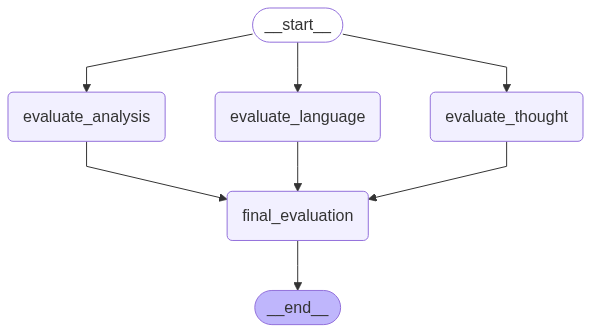

In [103]:
graph = StateGraph(UPSCState)

graph.add_node('evaluate_language', evaluate_language)
graph.add_node('evaluate_analysis', evaluate_analysis)
graph.add_node('evaluate_thought', evaluate_thought)
graph.add_node('final_evaluation', final_evaluation)

# edges
graph.add_edge(START, 'evaluate_language')
graph.add_edge(START, 'evaluate_analysis')
graph.add_edge(START, 'evaluate_thought')

graph.add_edge('evaluate_language', 'final_evaluation')
graph.add_edge('evaluate_analysis', 'final_evaluation')
graph.add_edge('evaluate_thought', 'final_evaluation')

graph.add_edge('final_evaluation', END)

workflow = graph.compile()
workflow

In [104]:
intial_state={
    'essay':essay,
    'individual_score': []
}
workflow.invoke(intial_state)

{'essay': '\nIndia plays a growing and strategic role in the global Artificial Intelligence (AI) ecosystem. Here\'s a breakdown of its role across several key areas:\n\n---\n\n### 🔬 **1. Research & Development**\n\n* **Academic Contribution**: Institutions like the Indian Institute of Science (IISc), IITs, and IIITs are producing significant AI research, particularly in areas like computer vision, natural language processing, and AI ethics.\n* **Private Sector R\\&D**: Companies like TCS, Infosys, Wipro, and startups are investing in AI labs and solutions. Global firms (Google, Microsoft, Amazon) have AI research centers in India.\n\n---\n\n### 💼 **2. Talent Pool**\n\n* **Large Technical Workforce**: India has one of the world’s largest populations of software developers and engineers. It produces millions of STEM graduates each year.\n* **Global AI Workforce**: Many AI researchers and engineers in top positions at global tech firms are Indian or of Indian origin.\n\n---\n\n### 🌐 **3. 